In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../tools/')

In [3]:
import tools

# Load Data

In [4]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
x_train = train.drop(['SalePrice', 'Id'],axis=1)
y_train = train.SalePrice
x_test = test.drop(['Id'],axis=1)

In [5]:
prc = tools.Process(x_train,x_test,y_train)

# Analyse

## Overview

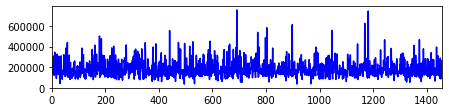

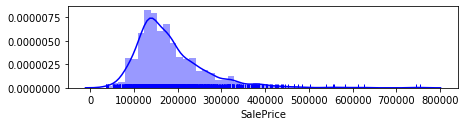

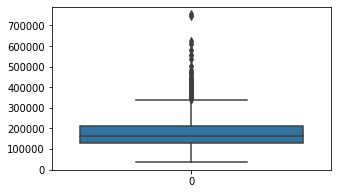

SalePrice has 0 NaNs (0.00%).
Skewness : 1.88
Kurtosis : 6.54
----------------------------------------------------------------------------------------------------


In [6]:
prc.viewY(dtype='numeric')

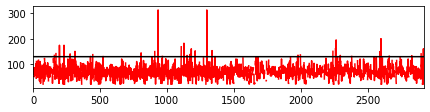

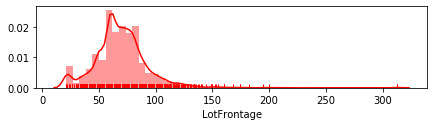

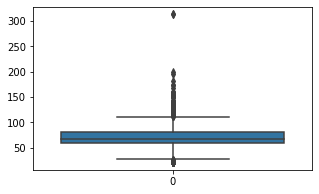

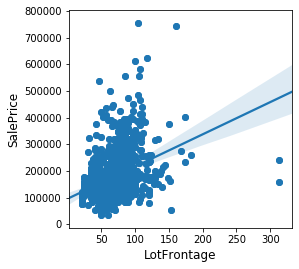

LotFrontage has 486 NaNs (16.65%).
Correlation Coefficient (LotFrontage vs SalePrice): 0.352
Skewness : 1.50
Kurtosis : 11.30
Number of anomaly scores over threshold(1.0%) : 40 / 2919
Border line :  129.0
----------------------------------------------------------------------------------------------------


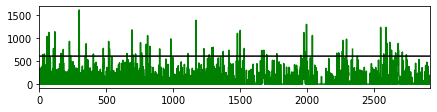

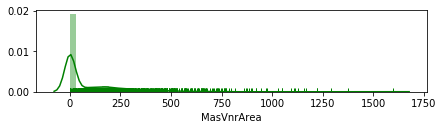

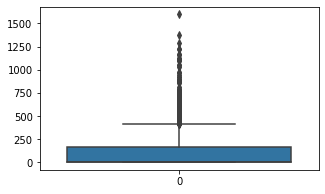

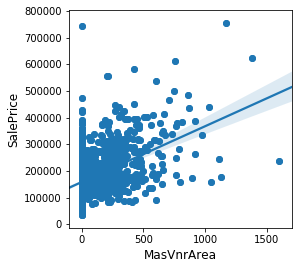

MasVnrArea has 23 NaNs (0.79%).
Correlation Coefficient (MasVnrArea vs SalePrice): 0.477
Skewness : 2.60
Kurtosis : 9.25
Number of anomaly scores over threshold(1.0%) : 72 / 2919
Border line :  604.0
----------------------------------------------------------------------------------------------------


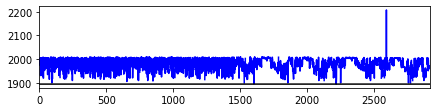

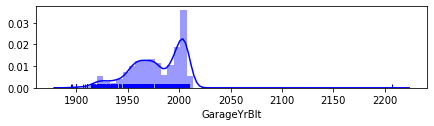

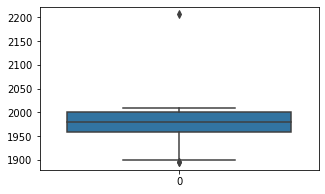

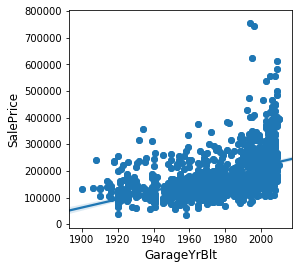

GarageYrBlt has 159 NaNs (5.45%).
Correlation Coefficient (GarageYrBlt vs SalePrice): 0.486
Skewness : -0.38
Kurtosis : 1.81
Number of anomaly scores over threshold(1.0%) : 11 / 2919
Border line :  1895.0
----------------------------------------------------------------------------------------------------


In [7]:
prc.viewF(dtype='float',significance=0.01)

## Missing Data

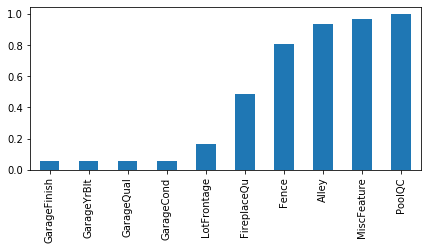

In [8]:
prc.NANs(top=10,bar=True,plot=False,get_return=False)

## Skewness

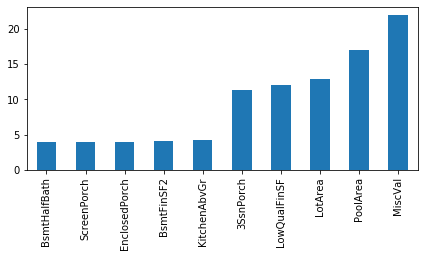

In [9]:
prc.Skews(top=10,bar=True,plot=False,get_return=False)

## Kurtosis

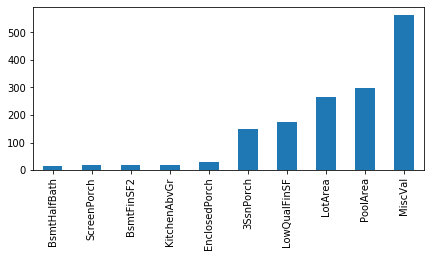

In [10]:
prc.Kurts(top=10,bar=True,plot=False,get_return=False)

## Variances

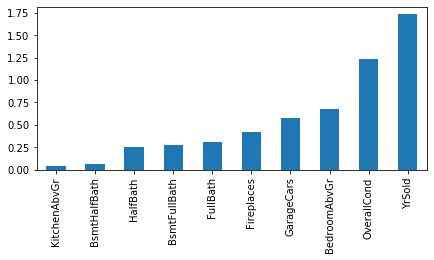

In [11]:
prc.Vars(bottom=10,bar=True,plot=False,get_return=False)

# Preprocess

In [12]:
prc = tools.Process(x_train,x_test,y_train)

## Transform distribution

In [13]:
prc.transY(method='log', inplace=True, get_return=False)
# prc.transY(method='boxcox', inplace=True, get_return=False)

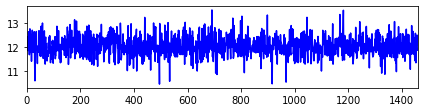

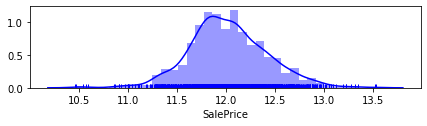

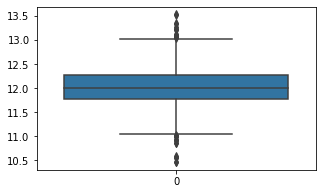

SalePrice has 0 NaNs (0.00%).
Skewness : 0.12
Kurtosis : 0.81
----------------------------------------------------------------------------------------------------


In [14]:
prc.viewY()

In [15]:
prc.transF(method='log',inplace=True,get_return=False)
# prc.transF(method='boxcox',inplace=True,get_return=False)  # <- negative
# prc.transF(method='johnson',inplace=True,get_return=False) # <- negative

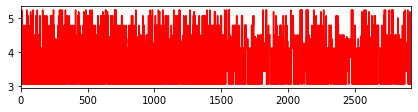

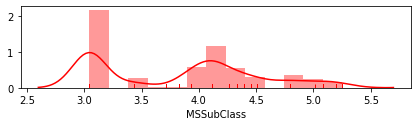

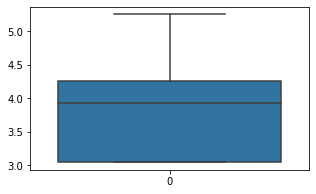

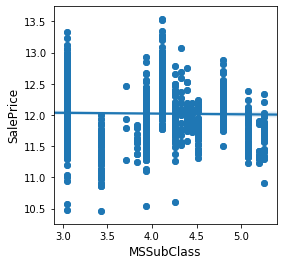

MSSubClass has 0 NaNs (0.00%).
Correlation Coefficient (MSSubClass vs SalePrice): -0.020
Skewness : 0.25
Kurtosis : -1.12
Number of anomaly scores over threshold(1.0%) : 0 / 2919
----------------------------------------------------------------------------------------------------


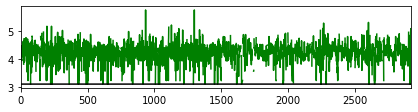

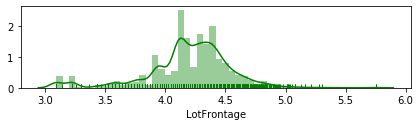

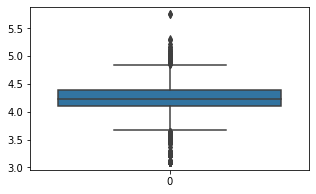

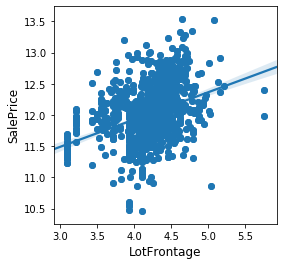

LotFrontage has 486 NaNs (16.65%).
Correlation Coefficient (LotFrontage vs SalePrice): 0.365
Skewness : -0.86
Kurtosis : 2.07
Number of anomaly scores over threshold(1.0%) : 112 / 2919
Border line :  3.091042453358316
----------------------------------------------------------------------------------------------------


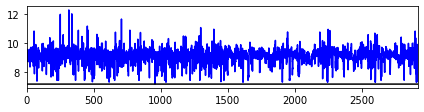

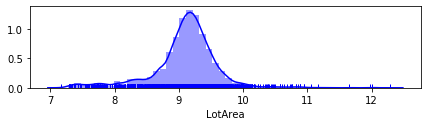

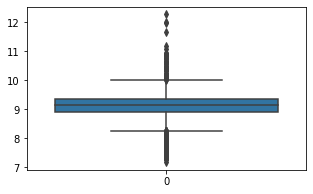

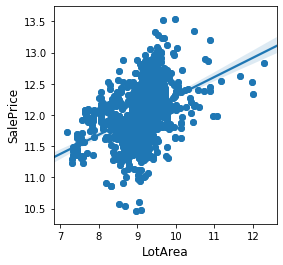

LotArea has 0 NaNs (0.00%).
Correlation Coefficient (LotArea vs SalePrice): 0.400
Skewness : -0.51
Kurtosis : 3.75
Number of anomaly scores over threshold(1.0%) : 89 / 2919
Border line :  7.170888478512505
----------------------------------------------------------------------------------------------------


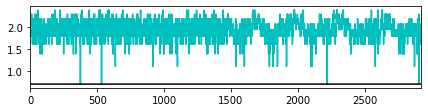

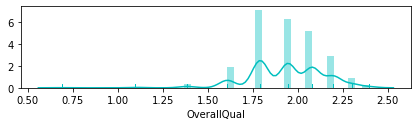

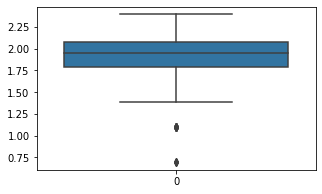

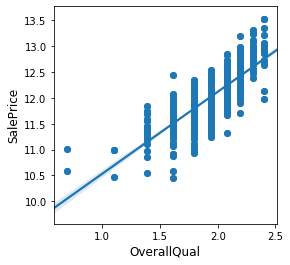

OverallQual has 0 NaNs (0.00%).
Correlation Coefficient (OverallQual vs SalePrice): 0.802
Skewness : -0.65
Kurtosis : 2.17
Number of anomaly scores over threshold(1.0%) : 17 / 2919
Border line :  0.6931471805599453
----------------------------------------------------------------------------------------------------


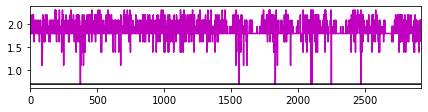

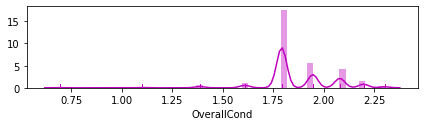

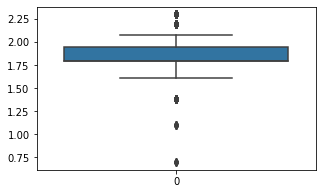

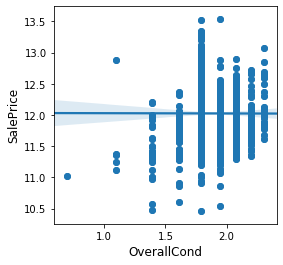

OverallCond has 0 NaNs (0.00%).
Correlation Coefficient (OverallCond vs SalePrice): -0.002
Skewness : -0.75
Kurtosis : 6.14
Number of anomaly scores over threshold(1.0%) : 17 / 2919
Border line :  0.6931471805599453
----------------------------------------------------------------------------------------------------


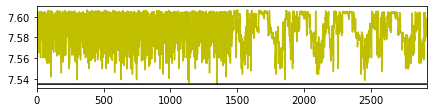

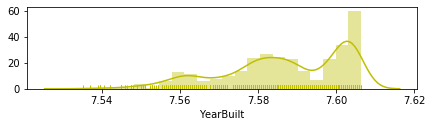

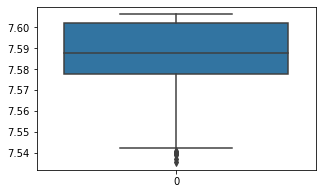

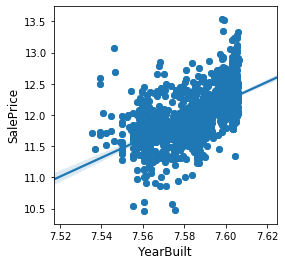

YearBuilt has 0 NaNs (0.00%).
Correlation Coefficient (YearBuilt vs SalePrice): 0.584
Skewness : -0.63
Kurtosis : -0.46
Number of anomaly scores over threshold(1.0%) : 11 / 2919
Border line :  7.5352967024440884
----------------------------------------------------------------------------------------------------


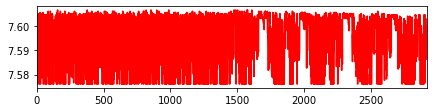

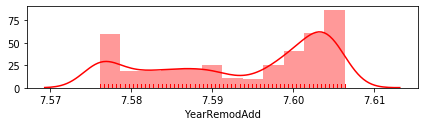

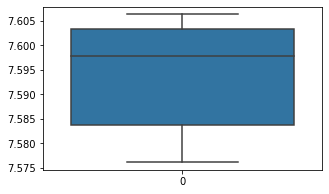

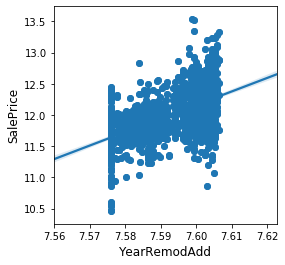

YearRemodAdd has 0 NaNs (0.00%).
Correlation Coefficient (YearRemodAdd vs SalePrice): 0.566
Skewness : -0.46
Kurtosis : -1.34
Number of anomaly scores over threshold(1.0%) : 0 / 2919
----------------------------------------------------------------------------------------------------


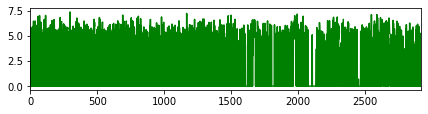

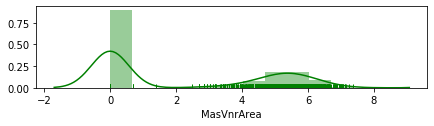

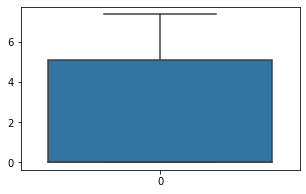

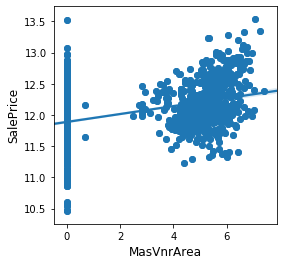

MasVnrArea has 23 NaNs (0.79%).
Correlation Coefficient (MasVnrArea vs SalePrice): 0.419
Skewness : 0.52
Kurtosis : -1.60
Number of anomaly scores over threshold(1.0%) : 0 / 2919
----------------------------------------------------------------------------------------------------


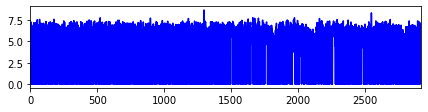

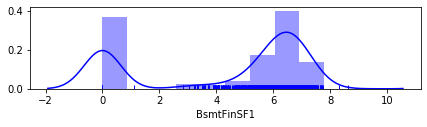

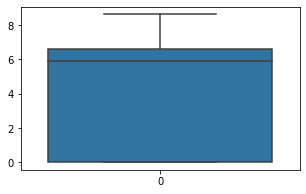

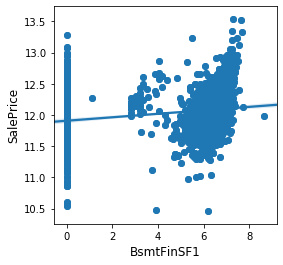

BsmtFinSF1 has 1 NaNs (0.03%).
Correlation Coefficient (BsmtFinSF1 vs SalePrice): 0.208
Skewness : -0.62
Kurtosis : -1.47
Number of anomaly scores over threshold(1.0%) : 0 / 2919
----------------------------------------------------------------------------------------------------


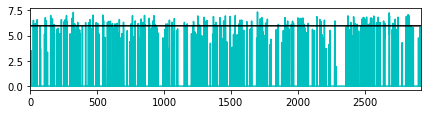

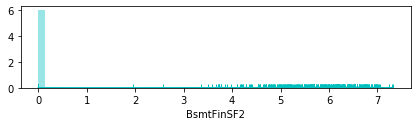

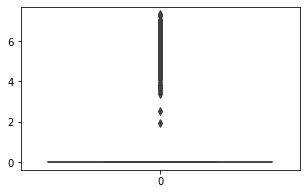

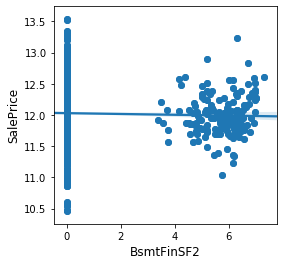

BsmtFinSF2 has 1 NaNs (0.03%).
Correlation Coefficient (BsmtFinSF2 vs SalePrice): -0.030
Skewness : 2.46
Kurtosis : 4.25
Number of anomaly scores over threshold(1.0%) : 162 / 2919
Border line :  5.961005339623274
----------------------------------------------------------------------------------------------------


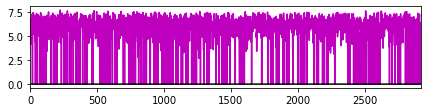

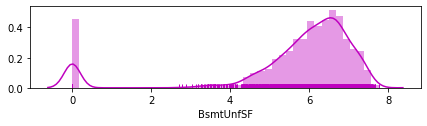

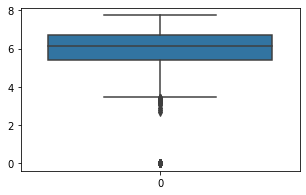

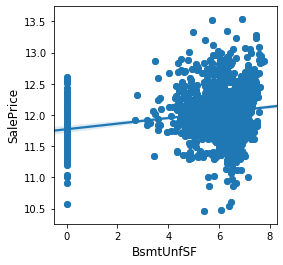

BsmtUnfSF has 1 NaNs (0.03%).
Correlation Coefficient (BsmtUnfSF vs SalePrice): 0.208
Skewness : -2.16
Kurtosis : 3.98
Number of anomaly scores over threshold(1.0%) : 241 / 2919
Border line :  0.0
----------------------------------------------------------------------------------------------------


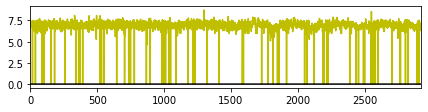

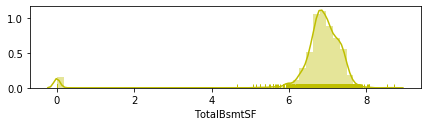

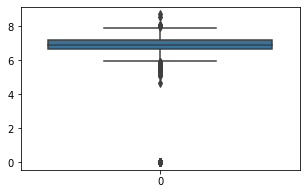

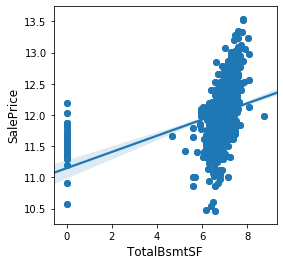

TotalBsmtSF has 1 NaNs (0.03%).
Correlation Coefficient (TotalBsmtSF vs SalePrice): 0.373
Skewness : -4.98
Kurtosis : 25.84
Number of anomaly scores over threshold(1.0%) : 78 / 2919
Border line :  0.0
----------------------------------------------------------------------------------------------------


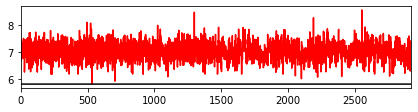

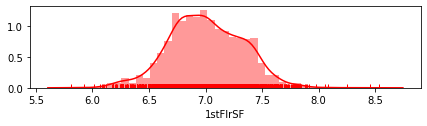

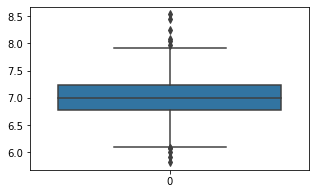

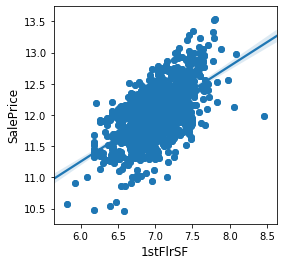

1stFlrSF has 0 NaNs (0.00%).
Correlation Coefficient (1stFlrSF vs SalePrice): 0.609
Skewness : 0.06
Kurtosis : 0.16
Number of anomaly scores over threshold(1.0%) : 13 / 2919
Border line :  5.814130531825066
----------------------------------------------------------------------------------------------------


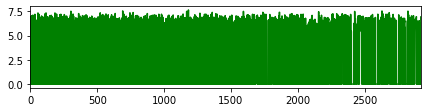

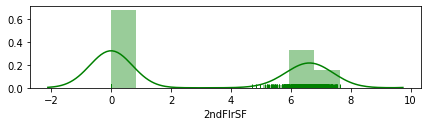

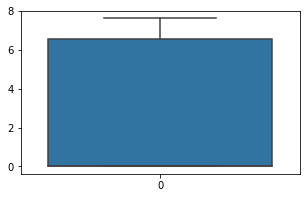

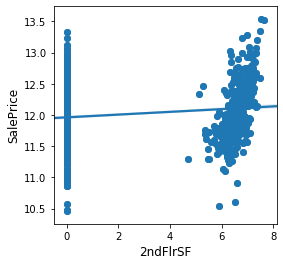

2ndFlrSF has 0 NaNs (0.00%).
Correlation Coefficient (2ndFlrSF vs SalePrice): 0.181
Skewness : 0.31
Kurtosis : -1.89
Number of anomaly scores over threshold(1.0%) : 0 / 2919
----------------------------------------------------------------------------------------------------


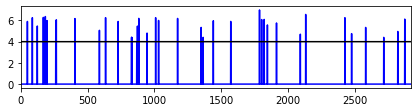

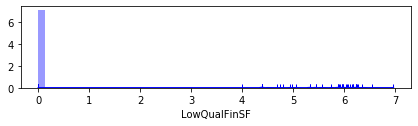

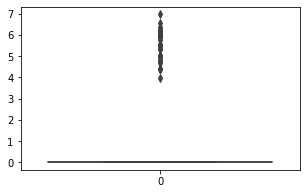

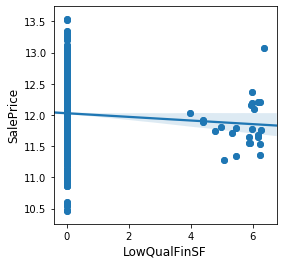

LowQualFinSF has 0 NaNs (0.00%).
Correlation Coefficient (LowQualFinSF vs SalePrice): -0.055
Skewness : 8.56
Kurtosis : 72.31
Number of anomaly scores over threshold(1.0%) : 40 / 2919
Border line :  3.9889840465642745
----------------------------------------------------------------------------------------------------


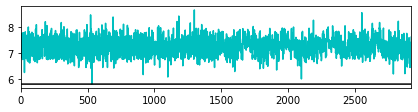

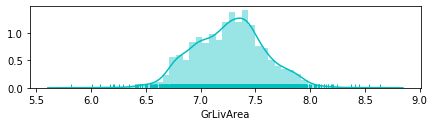

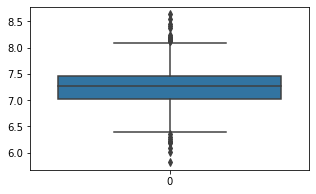

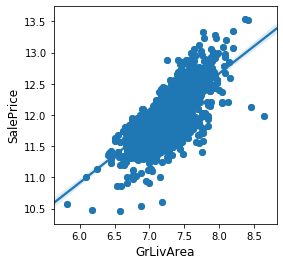

GrLivArea has 0 NaNs (0.00%).
Correlation Coefficient (GrLivArea vs SalePrice): 0.730
Skewness : 0.01
Kurtosis : 0.21
Number of anomaly scores over threshold(1.0%) : 17 / 2919
Border line :  5.814130531825066
----------------------------------------------------------------------------------------------------


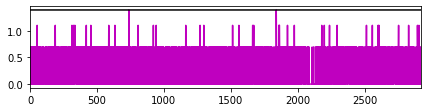

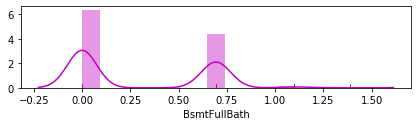

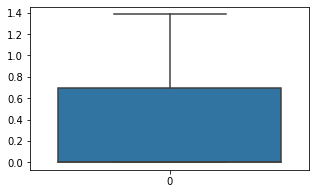

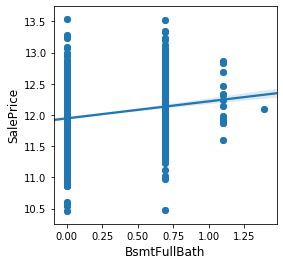

BsmtFullBath has 2 NaNs (0.07%).
Correlation Coefficient (BsmtFullBath vs SalePrice): 0.239
Skewness : 0.42
Kurtosis : -1.63
Number of anomaly scores over threshold(1.0%) : 2 / 2919
Border line :  1.3862943611198906
----------------------------------------------------------------------------------------------------


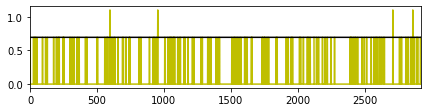

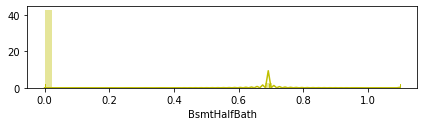

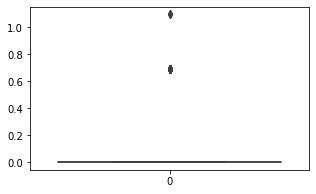

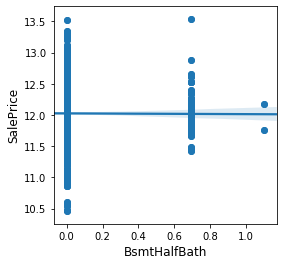

BsmtHalfBath has 2 NaNs (0.07%).
Correlation Coefficient (BsmtHalfBath vs SalePrice): -0.005
Skewness : 3.78
Kurtosis : 12.59
Number of anomaly scores over threshold(1.0%) : 175 / 2919
Border line :  0.6931471805599453
----------------------------------------------------------------------------------------------------


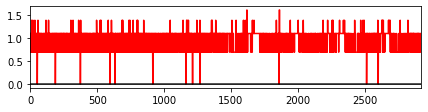

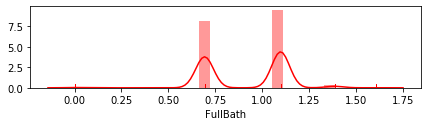

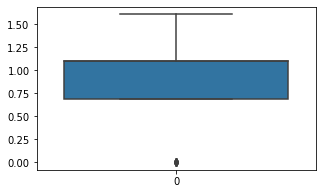

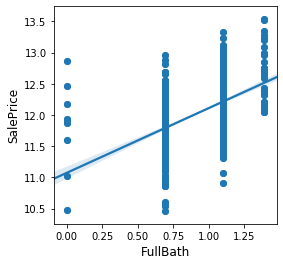

FullBath has 0 NaNs (0.00%).
Correlation Coefficient (FullBath vs SalePrice): 0.580
Skewness : -0.25
Kurtosis : -0.47
Number of anomaly scores over threshold(1.0%) : 16 / 2919
Border line :  0.0
----------------------------------------------------------------------------------------------------


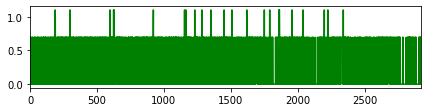

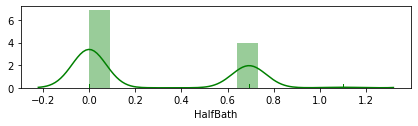

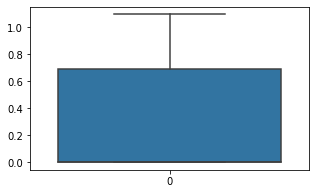

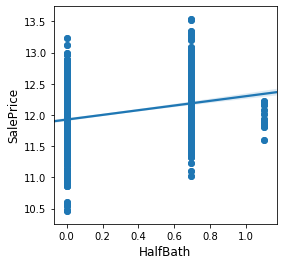

HalfBath has 0 NaNs (0.00%).
Correlation Coefficient (HalfBath vs SalePrice): 0.321
Skewness : 0.58
Kurtosis : -1.55
Number of anomaly scores over threshold(1.0%) : 0 / 2919
----------------------------------------------------------------------------------------------------


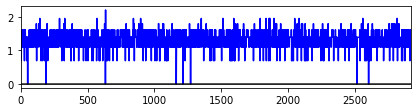

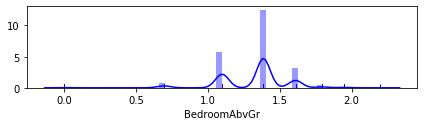

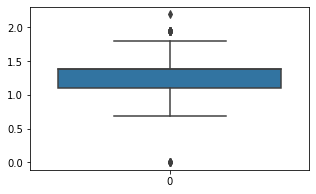

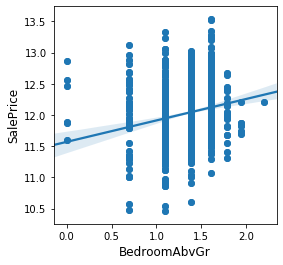

BedroomAbvGr has 0 NaNs (0.00%).
Correlation Coefficient (BedroomAbvGr vs SalePrice): 0.198
Skewness : -0.98
Kurtosis : 3.66
Number of anomaly scores over threshold(1.0%) : 9 / 2919
Border line :  0.0
----------------------------------------------------------------------------------------------------


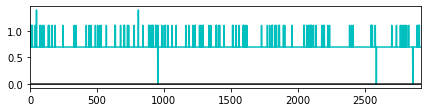

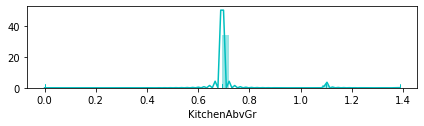

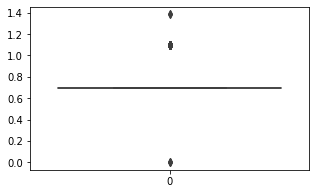

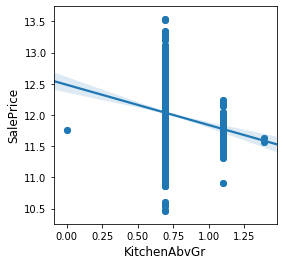

KitchenAbvGr has 0 NaNs (0.00%).
Correlation Coefficient (KitchenAbvGr vs SalePrice): -0.144
Skewness : 3.52
Kurtosis : 20.27
Number of anomaly scores over threshold(1.0%) : 134 / 2919
Border line :  0.0
----------------------------------------------------------------------------------------------------


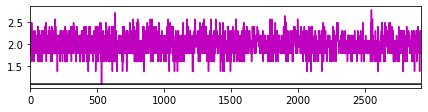

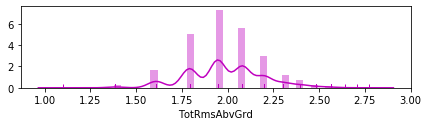

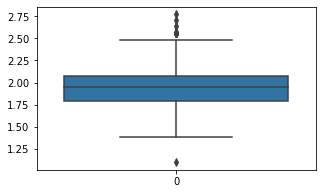

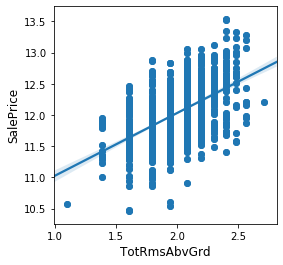

TotRmsAbvGrd has 0 NaNs (0.00%).
Correlation Coefficient (TotRmsAbvGrd vs SalePrice): 0.540
Skewness : 0.04
Kurtosis : 0.32
Number of anomaly scores over threshold(1.0%) : 29 / 2919
Border line :  1.0986122886681096
----------------------------------------------------------------------------------------------------


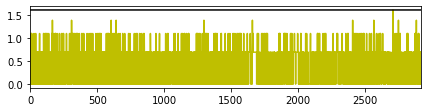

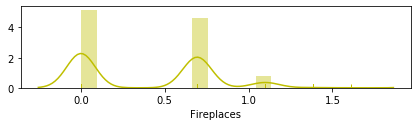

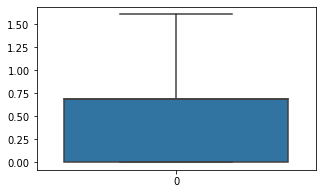

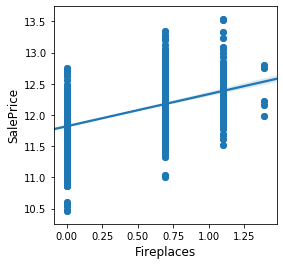

Fireplaces has 0 NaNs (0.00%).
Correlation Coefficient (Fireplaces vs SalePrice): 0.509
Skewness : 0.24
Kurtosis : -1.42
Number of anomaly scores over threshold(1.0%) : 1 / 2919
Border line :  1.6094379124341003
----------------------------------------------------------------------------------------------------


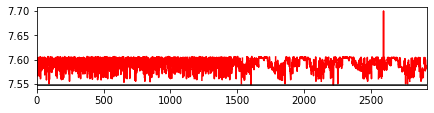

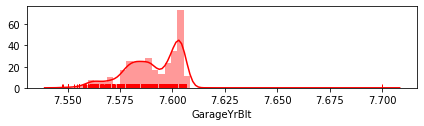

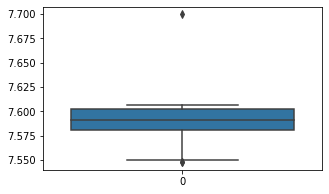

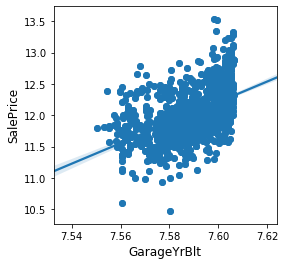

GarageYrBlt has 159 NaNs (5.45%).
Correlation Coefficient (GarageYrBlt vs SalePrice): 0.540
Skewness : -0.45
Kurtosis : 1.40
Number of anomaly scores over threshold(1.0%) : 11 / 2919
Border line :  7.547501682814967
----------------------------------------------------------------------------------------------------


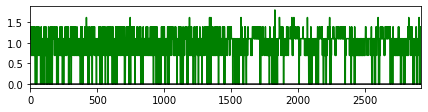

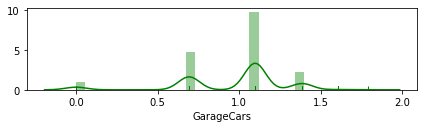

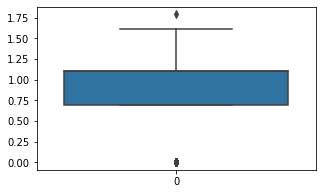

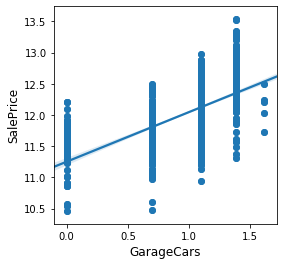

GarageCars has 1 NaNs (0.03%).
Correlation Coefficient (GarageCars vs SalePrice): 0.642
Skewness : -1.28
Kurtosis : 1.98
Number of anomaly scores over threshold(1.0%) : 157 / 2919
Border line :  0.0
----------------------------------------------------------------------------------------------------


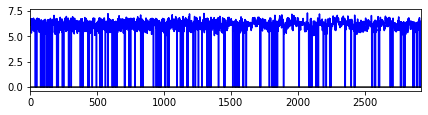

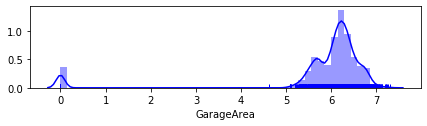

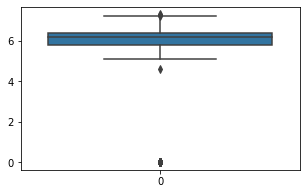

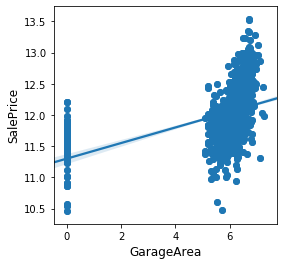

GarageArea has 1 NaNs (0.03%).
Correlation Coefficient (GarageArea vs SalePrice): 0.455
Skewness : -3.52
Kurtosis : 11.53
Number of anomaly scores over threshold(1.0%) : 157 / 2919
Border line :  0.0
----------------------------------------------------------------------------------------------------


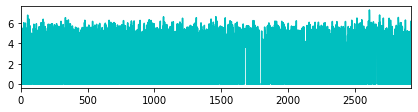

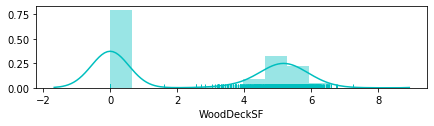

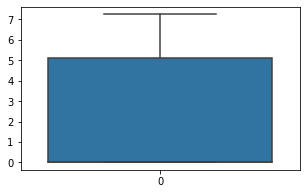

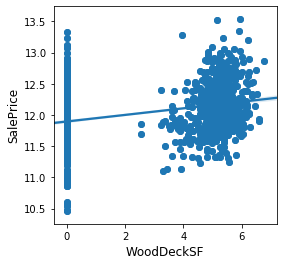

WoodDeckSF has 0 NaNs (0.00%).
Correlation Coefficient (WoodDeckSF vs SalePrice): 0.343
Skewness : 0.16
Kurtosis : -1.89
Number of anomaly scores over threshold(1.0%) : 0 / 2919
----------------------------------------------------------------------------------------------------


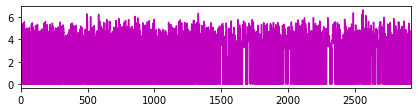

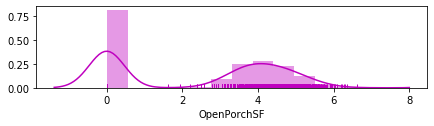

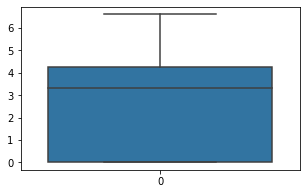

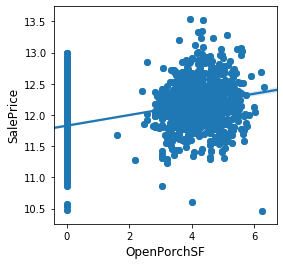

OpenPorchSF has 0 NaNs (0.00%).
Correlation Coefficient (OpenPorchSF vs SalePrice): 0.460
Skewness : -0.04
Kurtosis : -1.77
Number of anomaly scores over threshold(1.0%) : 0 / 2919
----------------------------------------------------------------------------------------------------


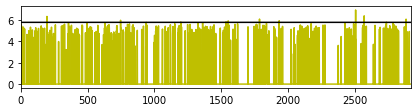

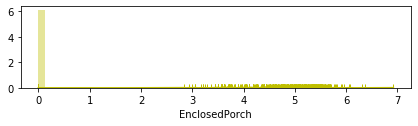

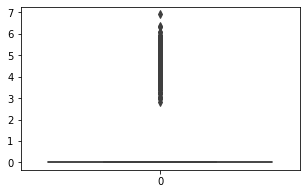

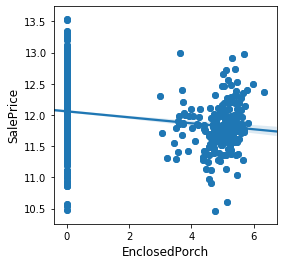

EnclosedPorch has 0 NaNs (0.00%).
Correlation Coefficient (EnclosedPorch vs SalePrice): -0.207
Skewness : 1.96
Kurtosis : 1.98
Number of anomaly scores over threshold(1.0%) : 12 / 2919
Border line :  5.765191102784844
----------------------------------------------------------------------------------------------------


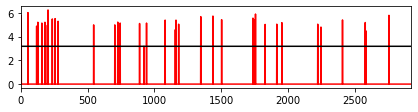

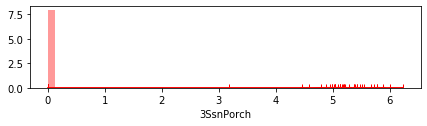

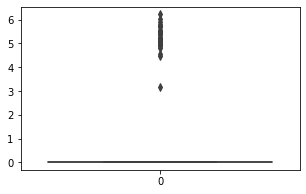

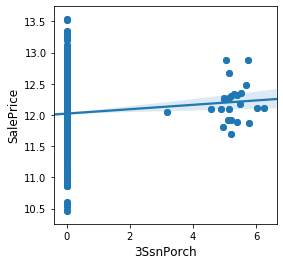

3SsnPorch has 0 NaNs (0.00%).
Correlation Coefficient (3SsnPorch vs SalePrice): 0.059
Skewness : 8.83
Kurtosis : 76.58
Number of anomaly scores over threshold(1.0%) : 37 / 2919
Border line :  3.1780538303479458
----------------------------------------------------------------------------------------------------


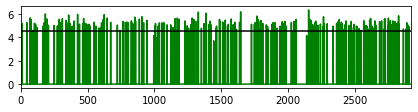

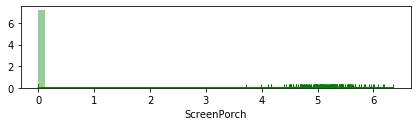

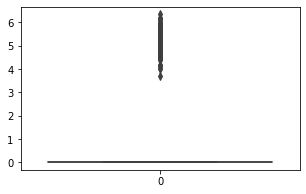

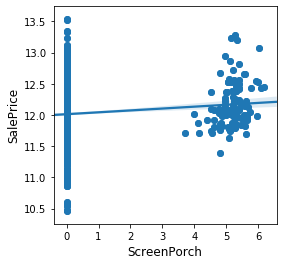

ScreenPorch has 0 NaNs (0.00%).
Correlation Coefficient (ScreenPorch vs SalePrice): 0.106
Skewness : 2.95
Kurtosis : 6.76
Number of anomaly scores over threshold(1.0%) : 243 / 2919
Border line :  4.553876891600541
----------------------------------------------------------------------------------------------------


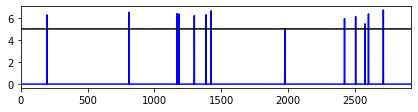

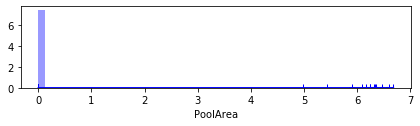

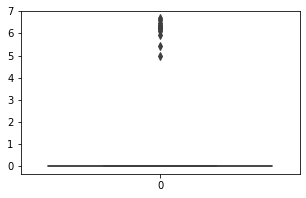

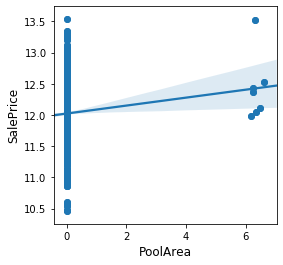

PoolArea has 0 NaNs (0.00%).
Correlation Coefficient (PoolArea vs SalePrice): 0.070
Skewness : 15.01
Kurtosis : 224.32
Number of anomaly scores over threshold(1.0%) : 13 / 2919
Border line :  4.976733742420574
----------------------------------------------------------------------------------------------------


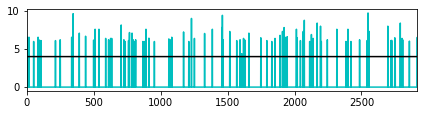

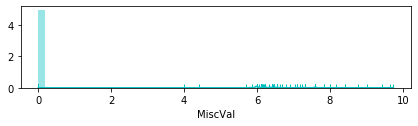

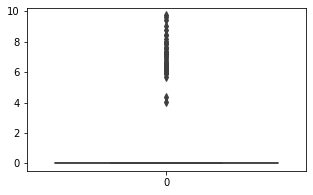

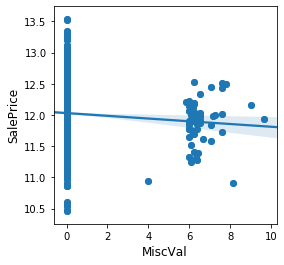

MiscVal has 0 NaNs (0.00%).
Correlation Coefficient (MiscVal vs SalePrice): -0.067
Skewness : 5.22
Kurtosis : 25.99
Number of anomaly scores over threshold(1.0%) : 103 / 2919
Border line :  4.007333185232471
----------------------------------------------------------------------------------------------------


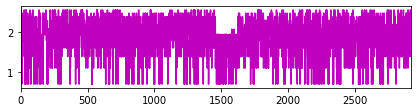

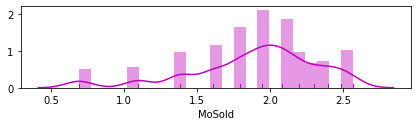

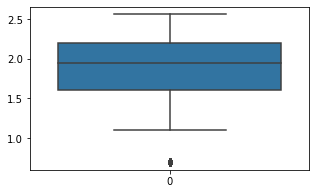

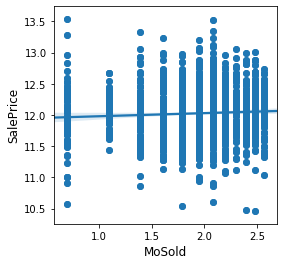

MoSold has 0 NaNs (0.00%).
Correlation Coefficient (MoSold vs SalePrice): 0.053
Skewness : -0.88
Kurtosis : 0.64
Number of anomaly scores over threshold(1.0%) : 0 / 2919
----------------------------------------------------------------------------------------------------


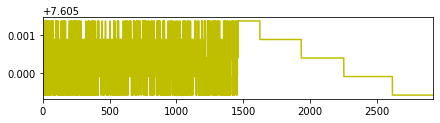

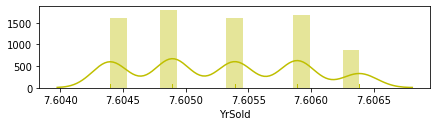

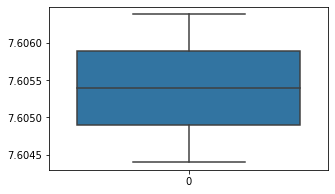

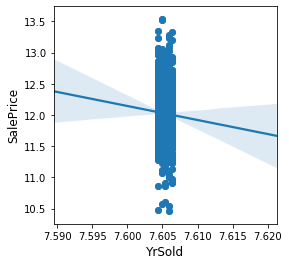

YrSold has 0 NaNs (0.00%).
Correlation Coefficient (YrSold vs SalePrice): -0.037
Skewness : 0.13
Kurtosis : -1.16
Number of anomaly scores over threshold(1.0%) : 0 / 2919
----------------------------------------------------------------------------------------------------


In [16]:
prc.viewF(dtype='numeric')

## Fill NAN

In [17]:
# x_train_filled,x_test_filled, y_train = prc.fill(
#     fill_method_num='median',
#     fill_method_object='Missing',
#     inplace=False,
#     get_return=True)
prc.fill(
    fill_method_num='median',
    fill_method_object='Missing',
    inplace=True,
    get_return=False)

Missing NAN of Numeric types is filled by : median.
Missing NAN of Numeric types is filled by : Missing.


In [18]:
prc.x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,Missing,Reg,Lvl,AllPub,Inside,...,0.0,0.0,Missing,Missing,Missing,0.0,1.098612,7.605392,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,Missing,Reg,Lvl,AllPub,FR2,...,0.0,0.0,Missing,Missing,Missing,0.0,1.791759,7.604894,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,Missing,IR1,Lvl,AllPub,Inside,...,0.0,0.0,Missing,Missing,Missing,0.0,2.302585,7.605392,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,Missing,IR1,Lvl,AllPub,Corner,...,0.0,0.0,Missing,Missing,Missing,0.0,1.098612,7.604396,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,Missing,IR1,Lvl,AllPub,FR2,...,0.0,0.0,Missing,Missing,Missing,0.0,2.564949,7.605392,WD,Normal


In [19]:
print(prc.x_train.shape)
print(prc.x_test.shape)
print(prc.missing.sum())

(1460, 79)
(1459, 79)
0


## Encode to numeric

In [20]:
# x_train_encoded, x_test_encoded, y_train = prc.encode(
#     method_enc='label', inplace=False, get_return=True)
prc.encode(method_enc='label', inplace=True, get_return=False)

In [21]:
prc.x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,4,4.189655,9.042040,1,1,3,3,0,4,...,0.0,0.0,3,2,1,0.0,1.098612,7.605392,9,4
1,3.044522,4,4.394449,9.169623,1,1,3,3,0,2,...,0.0,0.0,3,2,1,0.0,1.791759,7.604894,9,4
2,4.110874,4,4.234107,9.328212,1,1,0,3,0,4,...,0.0,0.0,3,2,1,0.0,2.302585,7.605392,9,4
3,4.262680,4,4.110874,9.164401,1,1,0,3,0,0,...,0.0,0.0,3,2,1,0.0,1.098612,7.604396,9,0
4,4.110874,4,4.442651,9.565284,1,1,0,3,0,2,...,0.0,0.0,3,2,1,0.0,2.564949,7.605392,9,4


In [22]:
print(prc.x_train.shape)
print(prc.x_test.shape)
print(prc.x_all.dtypes.unique())

(1460, 79)
(1459, 79)
[dtype('float64') dtype('int64')]


## Drop Low Variances

In [23]:
prc.dropVar(threshold=0.001,view=True,inplace=False,get_return=False)

Drop columns :  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
Droped 4 columns.


## Correlation Coefficient

### View Target

In [24]:
prc.CorrY(view_set=True,view_set_top=10,bar=False,plot=False,get_return=False)

                                        |corr|
Features                                      
(O, v, e, r, a, l, l, Q, u, a, l)     0.802067
(G, r, L, i, v, A, r, e, a)           0.730254
(G, a, r, a, g, e, C, a, r, s)        0.641561
(1, s, t, F, l, r, S, F)              0.608955
(Y, e, a, r, B, u, i, l, t)           0.584443
(E, x, t, e, r, Q, u, a, l)           0.582164
(F, u, l, l, B, a, t, h)              0.580297
(B, s, m, t, Q, u, a, l)              0.576969
(Y, e, a, r, R, e, m, o, d, A, d, d)  0.565590
(K, i, t, c, h, e, n, Q, u, a, l)     0.562738


### View Features

In [25]:
df_corrF = prc.CorrF(view_set=True,view_set_top=10,view_map=False,get_return=True)

           var1          var2    |corr|
0       MiscVal   MiscFeature  0.878293
1   Exterior2nd   Exterior1st  0.860106
2    GarageArea    GarageCars  0.847460
3    BsmtFinSF2  BsmtFinType2  0.829570
4  TotRmsAbvGrd     GrLivArea  0.810082
5    BsmtFinSF1  BsmtFinType1  0.802776
6   GarageYrBlt     YearBuilt  0.786456
7        PoolQC      PoolArea  0.780385
8       LotArea   LotFrontage  0.686435
9  TotRmsAbvGrd  BedroomAbvGr  0.654610


In [26]:
x_train.shape, df_corrF.shape

((1460, 79), (3081, 3))

### Drop High Correlation Coefficient

In [27]:
# x_train_droped, x_test_droped, y_train = prc.dropCorr(threshold=0.8,inplace=False,get_return=True)
prc.dropCorr(threshold=0.8,inplace=True,get_return=False)

Droped columns by Corr : ['Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'TotRmsAbvGrd', 'GarageArea', 'MiscVal']



In [28]:
prc.x_all.shape

(2919, 73)

## Reject Outliers

In [29]:
prc.rejectOut(['LotFrontage'],significance=0.01, inplace=False, get_return=False)

Rejected data by Outliers from :  ['LotFrontage']
Rejected 48 data.
